# Machine Learning

## Session #8: Hidden Markov Models for stock data analysis

This notebook is based on the notebook [``plot_hmm_stock_analysis.ipynb``](http://hmmlearn.readthedocs.org/en/stable/auto_examples/plot_hmm_stock_analysis.html#sphx-glr-auto-examples-plot-hmm-stock-analysis-py) of [hmmlearn](http://hmmlearn.readthedocs.org/en/stable/index.html) and [``date_demo1.py``](http://matplotlib.org/examples/pylab_examples/date_demo1.html) of [matplotlib](http://matplotlib.org/index.html).

The iPython Notebook should be send by email as s8_HMM_firstname_familyname.ipynb

### 1. Yahoo! stock market time series

This script load a time series containing the stock price data from Yahoo! finance and shows how to use Gaussian HMM on it

In [1]:
%matplotlib inline
from __future__ import print_function

import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM


print(__doc__)

quotes = quotes_historical_yahoo_ochl(
    "INTC", datetime.date(1995, 1, 1), datetime.date(2015, 1, 6))

# Unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])

Automatically created module for IPython interactive environment


Run Gaussian HMM


In [2]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...done


Print trained parameters and plot


Transition matrix
[[  7.71111147e-01   2.83756140e-03   9.09318302e-03   2.16958109e-01]
 [  2.53143664e-06   9.14683584e-01   6.88714219e-02   1.64424629e-02]
 [  3.82345030e-02   1.38632045e-01   8.02771029e-01   2.03624228e-02]
 [  9.62880709e-02   1.19075069e-02   4.63497048e-03   8.87169452e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  2.77484856e-02   9.56054796e+07]
var =  [  1.43372081e-01   8.82085102e+14]

1th hidden state
mean =  [  8.91027485e-03   3.54033944e+07]
var =  [  1.44945492e-01   1.09490162e+14]

2th hidden state
mean =  [ -3.74669797e-02   7.25088697e+07]
var =  [  1.84346421e+00   2.51346828e+15]

3th hidden state
mean =  [  4.55767297e-03   5.69503566e+07]
var =  [  6.85203802e-02   1.52654717e+14]



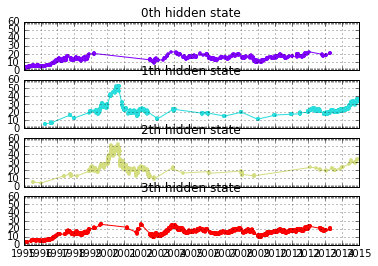

In [3]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

### 2. Explaining the model

Provide an explanation on the meaning of the hidden states and the parameters of the model (transition probability matrix and emission probabilities).

1) 0th hidden state and 3th hidden state reflect the volatility of the stock price，the stocks slump or jump. And 0th hidden state reflects the jump，3th hidden state reflects the slump. 1th hidden state and 2th hidden state reflect the stable period of stock price.

2) According to transition probability matrix, from 1995/1/1 to 2015/1/6，the probability of 0th hidden state turn to  2th hidden state is low, the probability of maintaining its status is higher. The probability of maintaining 1th hidden state and 2th hidden state its status is lower than the probability of 0th hidden state turn to 3th hidden state. This means, during this period, stock prices tend to large fluctuations.

3) According to emission probabilities, the average share price which 0th-2th hidden state corresponding change is not great, but there are big differences in volume.3th hidden state average stock price change is negative, the reaction is more fell state.

### 3. Changing the model parameters

* Change the number of hidden states, from 2 to 6, calculate the likelihood of each model, and try to repeat the above explanations
* With 4 hidden states, change the number of initizalizations to 1 and evaluate the likelihood of the model in 10 runs of the EM algorithm


In [5]:
### 3. Changing the model parameters
# Change the number of hidden states, from 2 to 6, calculate the likelihood of each model, 
# and try to repeat the above explanations
from hmmlearn.hmm import GaussianHMM
num_st_list = [2, 3, 4, 5, 6]
for num_st in num_st_list:
    # Make an HMM instance and execute fit
    model = GaussianHMM(n_components=num_st, covariance_type="diag", n_iter=1000).fit(X)

    # calculate the likelihood
    score = model.score(X)
    print("num_st: %d, likelihood: %f" % (num_st, score))


# With 4 hidden states, change the number of initizalizations to 1 and evaluate the 
# likelihood of the model in 10 runs of the EM algorithm
for i in range(10):
    # Make an HMM instance and execute fit
    model = GaussianHMM(n_components=4, covariance_type="diag", random_state=i, n_iter=1000).fit(X)

    # calculate the likelihood
    score = model.score(X)
    print("iter %d, likelihood: %f" % (i, score))


num_st: 2, likelihood: -95737.296416
num_st: 3, likelihood: -94858.495018
num_st: 4, likelihood: -94337.049434
num_st: 5, likelihood: -93690.893807
num_st: 6, likelihood: -93435.956766
iter 0, likelihood: -94337.049435
iter 1, likelihood: -94337.049434
iter 2, likelihood: -94337.049981
iter 3, likelihood: -94337.049435
iter 4, likelihood: -94337.057827
iter 5, likelihood: -94337.049888
iter 6, likelihood: -94337.049434
iter 7, likelihood: -94337.049435
iter 8, likelihood: -94337.049435
iter 9, likelihood: -94333.921108


### 3. Changing the model

Change the emission probability to a GMM, and repeat #2 varying the number of component from 1 to 3 and the number of hidden states from 2 to 5

In [7]:
## 3. Changing the model
# Change the emission probability to a GMM, and repeat #2 varying the number of component
# from 1 to 3 and the number of hidden states from 2 to 5
from hmmlearn.hmm import GMMHMM
num_mix_list = [1, 2, 3]
num_st_list = [2, 3, 4, 5]
for num_mix in num_mix_list:
    for num_st in num_st_list:
        # Make an HMM instance and execute fit
        model = GMMHMM(n_components=num_st, n_mix=num_mix, covariance_type="diag", n_iter=1000).fit(X)

        # calculate the likelihood
        score = model.score(X)
        print("num_mix: %d, num_st: %d, likelihood: %f" % (num_mix, num_st, score))


num_mix: 1, num_st: 2, likelihood: -98018.902523
num_mix: 1, num_st: 3, likelihood: -98018.902524
num_mix: 1, num_st: 4, likelihood: -98018.902524
num_mix: 1, num_st: 5, likelihood: -98018.902525


/Users/eiqi/.local/lib/python2.7/site-packages/hmmlearn/hmm.py:593: RuntimeWarning: divide by zero encountered in log
  lgmm_posteriors = (np.log(g.predict_proba(X))


num_mix: 2, num_st: 2, likelihood: -94773.896367
num_mix: 2, num_st: 3, likelihood: -94773.889439
num_mix: 2, num_st: 4, likelihood: -94773.888564
num_mix: 2, num_st: 5, likelihood: -94773.892267
num_mix: 3, num_st: 2, likelihood: -94317.503711
num_mix: 3, num_st: 3, likelihood: -93701.635999


/Users/eiqi/.local/lib/python2.7/site-packages/hmmlearn/base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/Users/eiqi/.local/lib/python2.7/site-packages/hmmlearn/base.py:468: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),


num_mix: 3, num_st: 4, likelihood: -93271.362824
num_mix: 3, num_st: 5, likelihood: -93730.386249
